<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [184]:
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import confusion_matrix

In [185]:
!pip install keras-tuner

## Load the dataset

In [186]:
# drive.mount('/content/drive')

In [187]:
# dataset_path = '/content/drive/MyDrive/ML IIT/coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [188]:
url = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Check dataset behaviour

In [189]:
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [190]:
df.shape

(7043, 21)

In [191]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [193]:
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']

In [194]:
#corr_matrix=df[numerical_cols].corr()
#corr_matrix

#This will shows error because the TotalCharges data type is string.

In [195]:
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None

df['TotalCharges'] = df['TotalCharges'].apply(convert_to_numeric)

In [196]:
corr_matrix=df[numerical_cols].corr()
corr_matrix

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651065,0.24790
TotalCharges,0.651065,1.000000,0.82588
tenure,0.247900,0.825880,1.00000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Categorical Variables Distribution

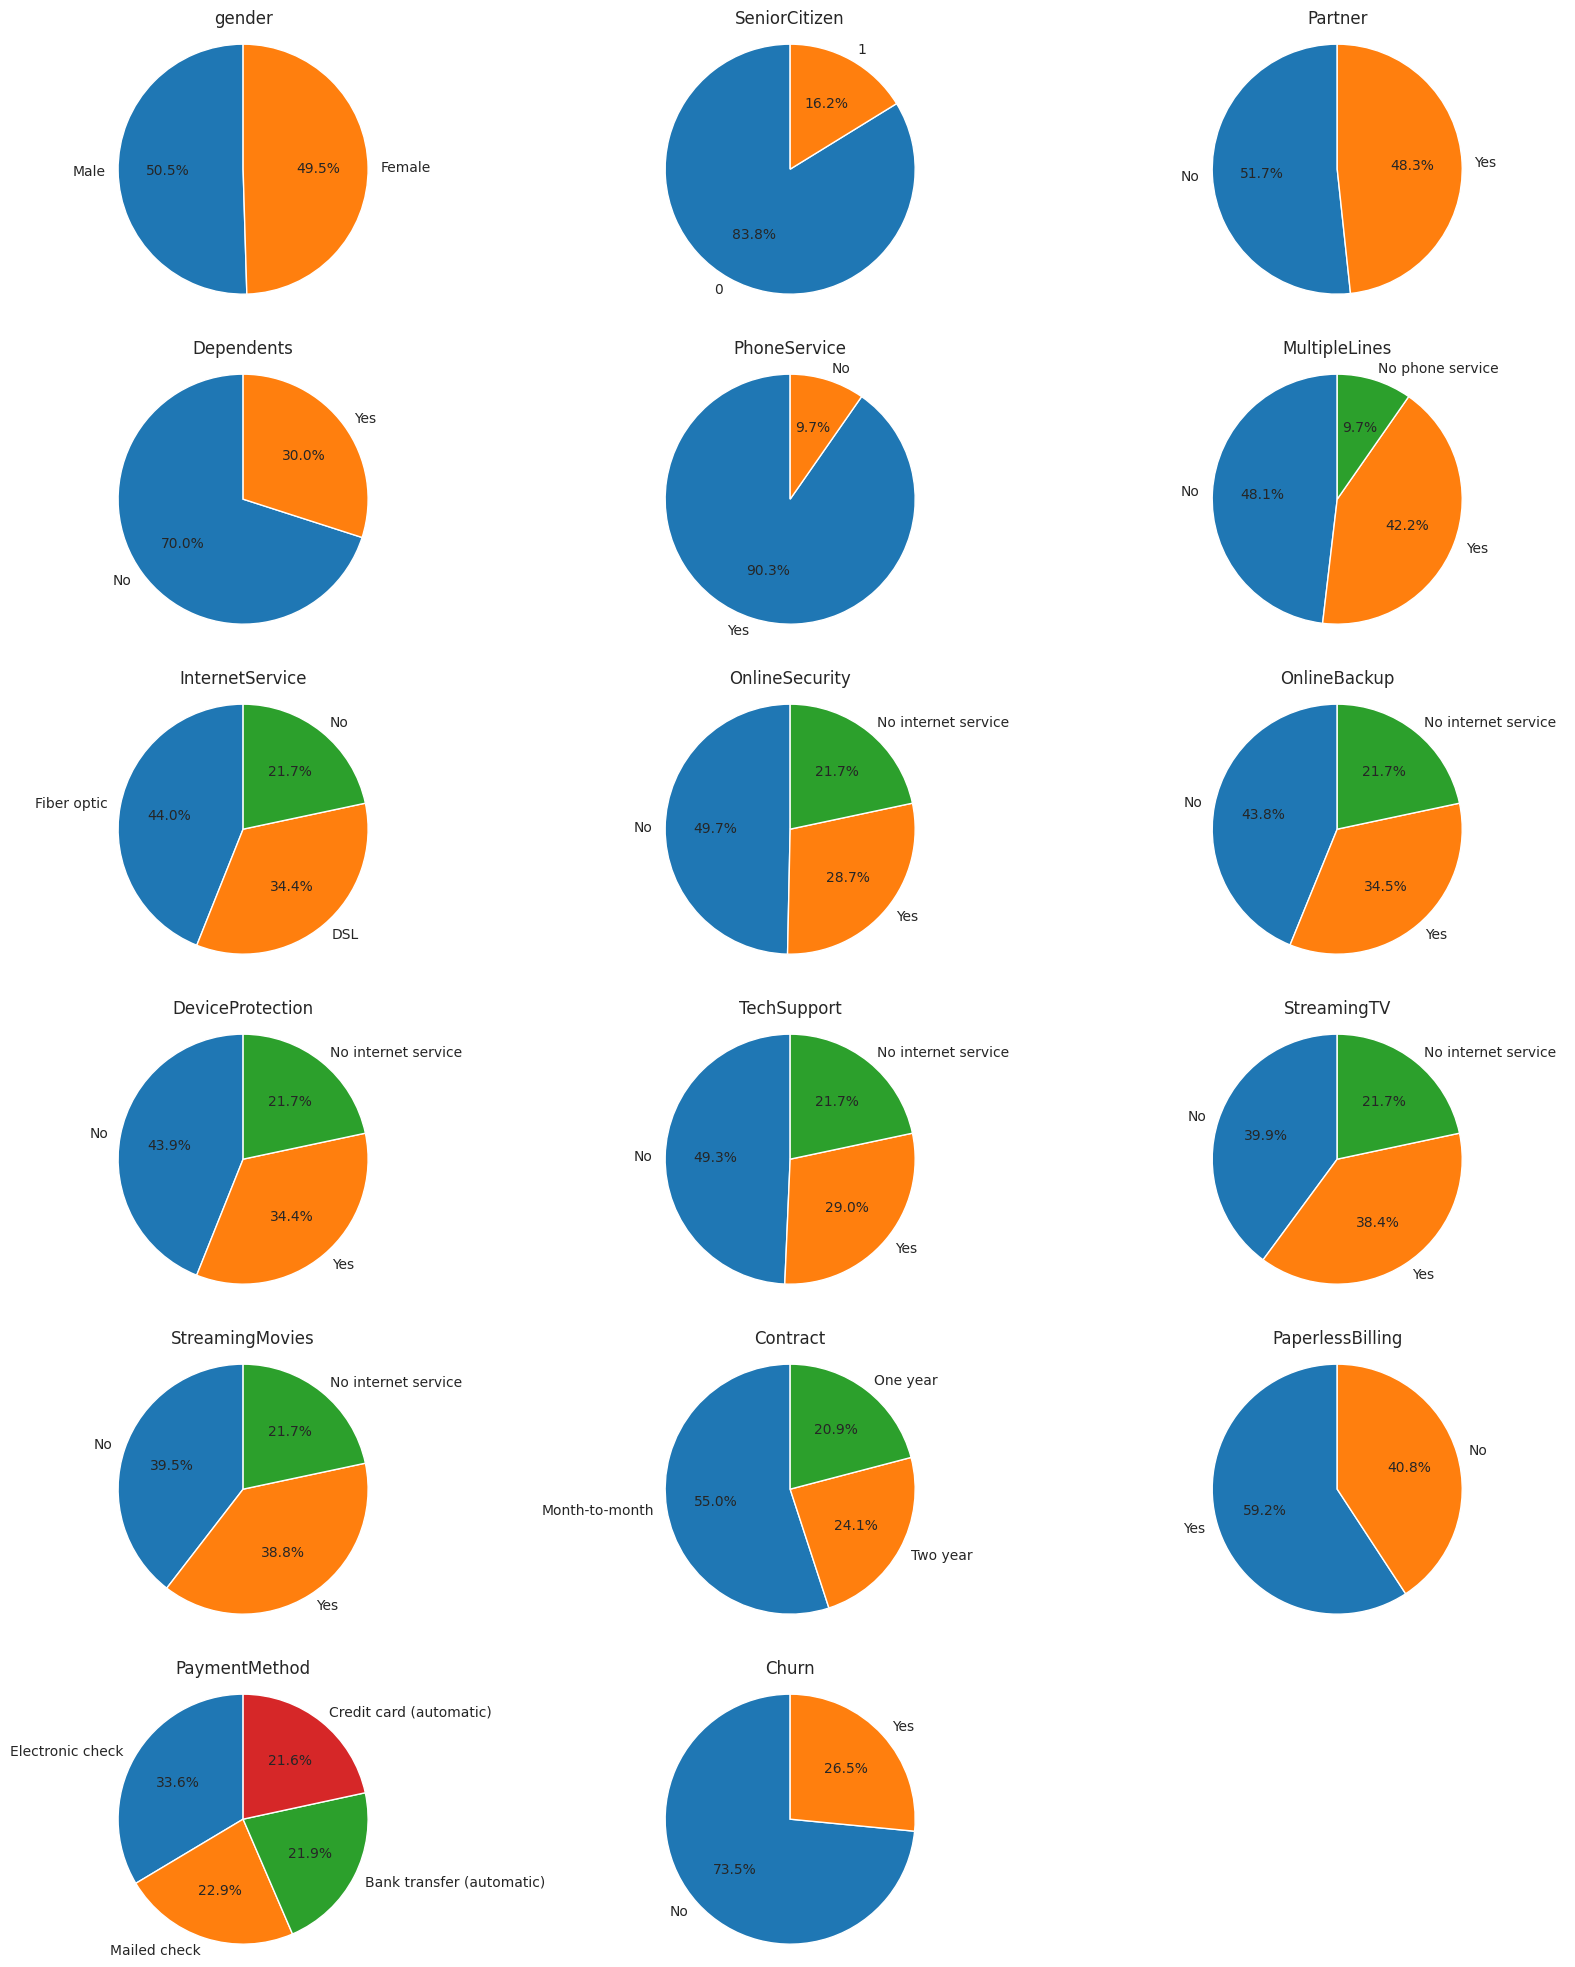

In [198]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
    plt.title(col)
plt.show()

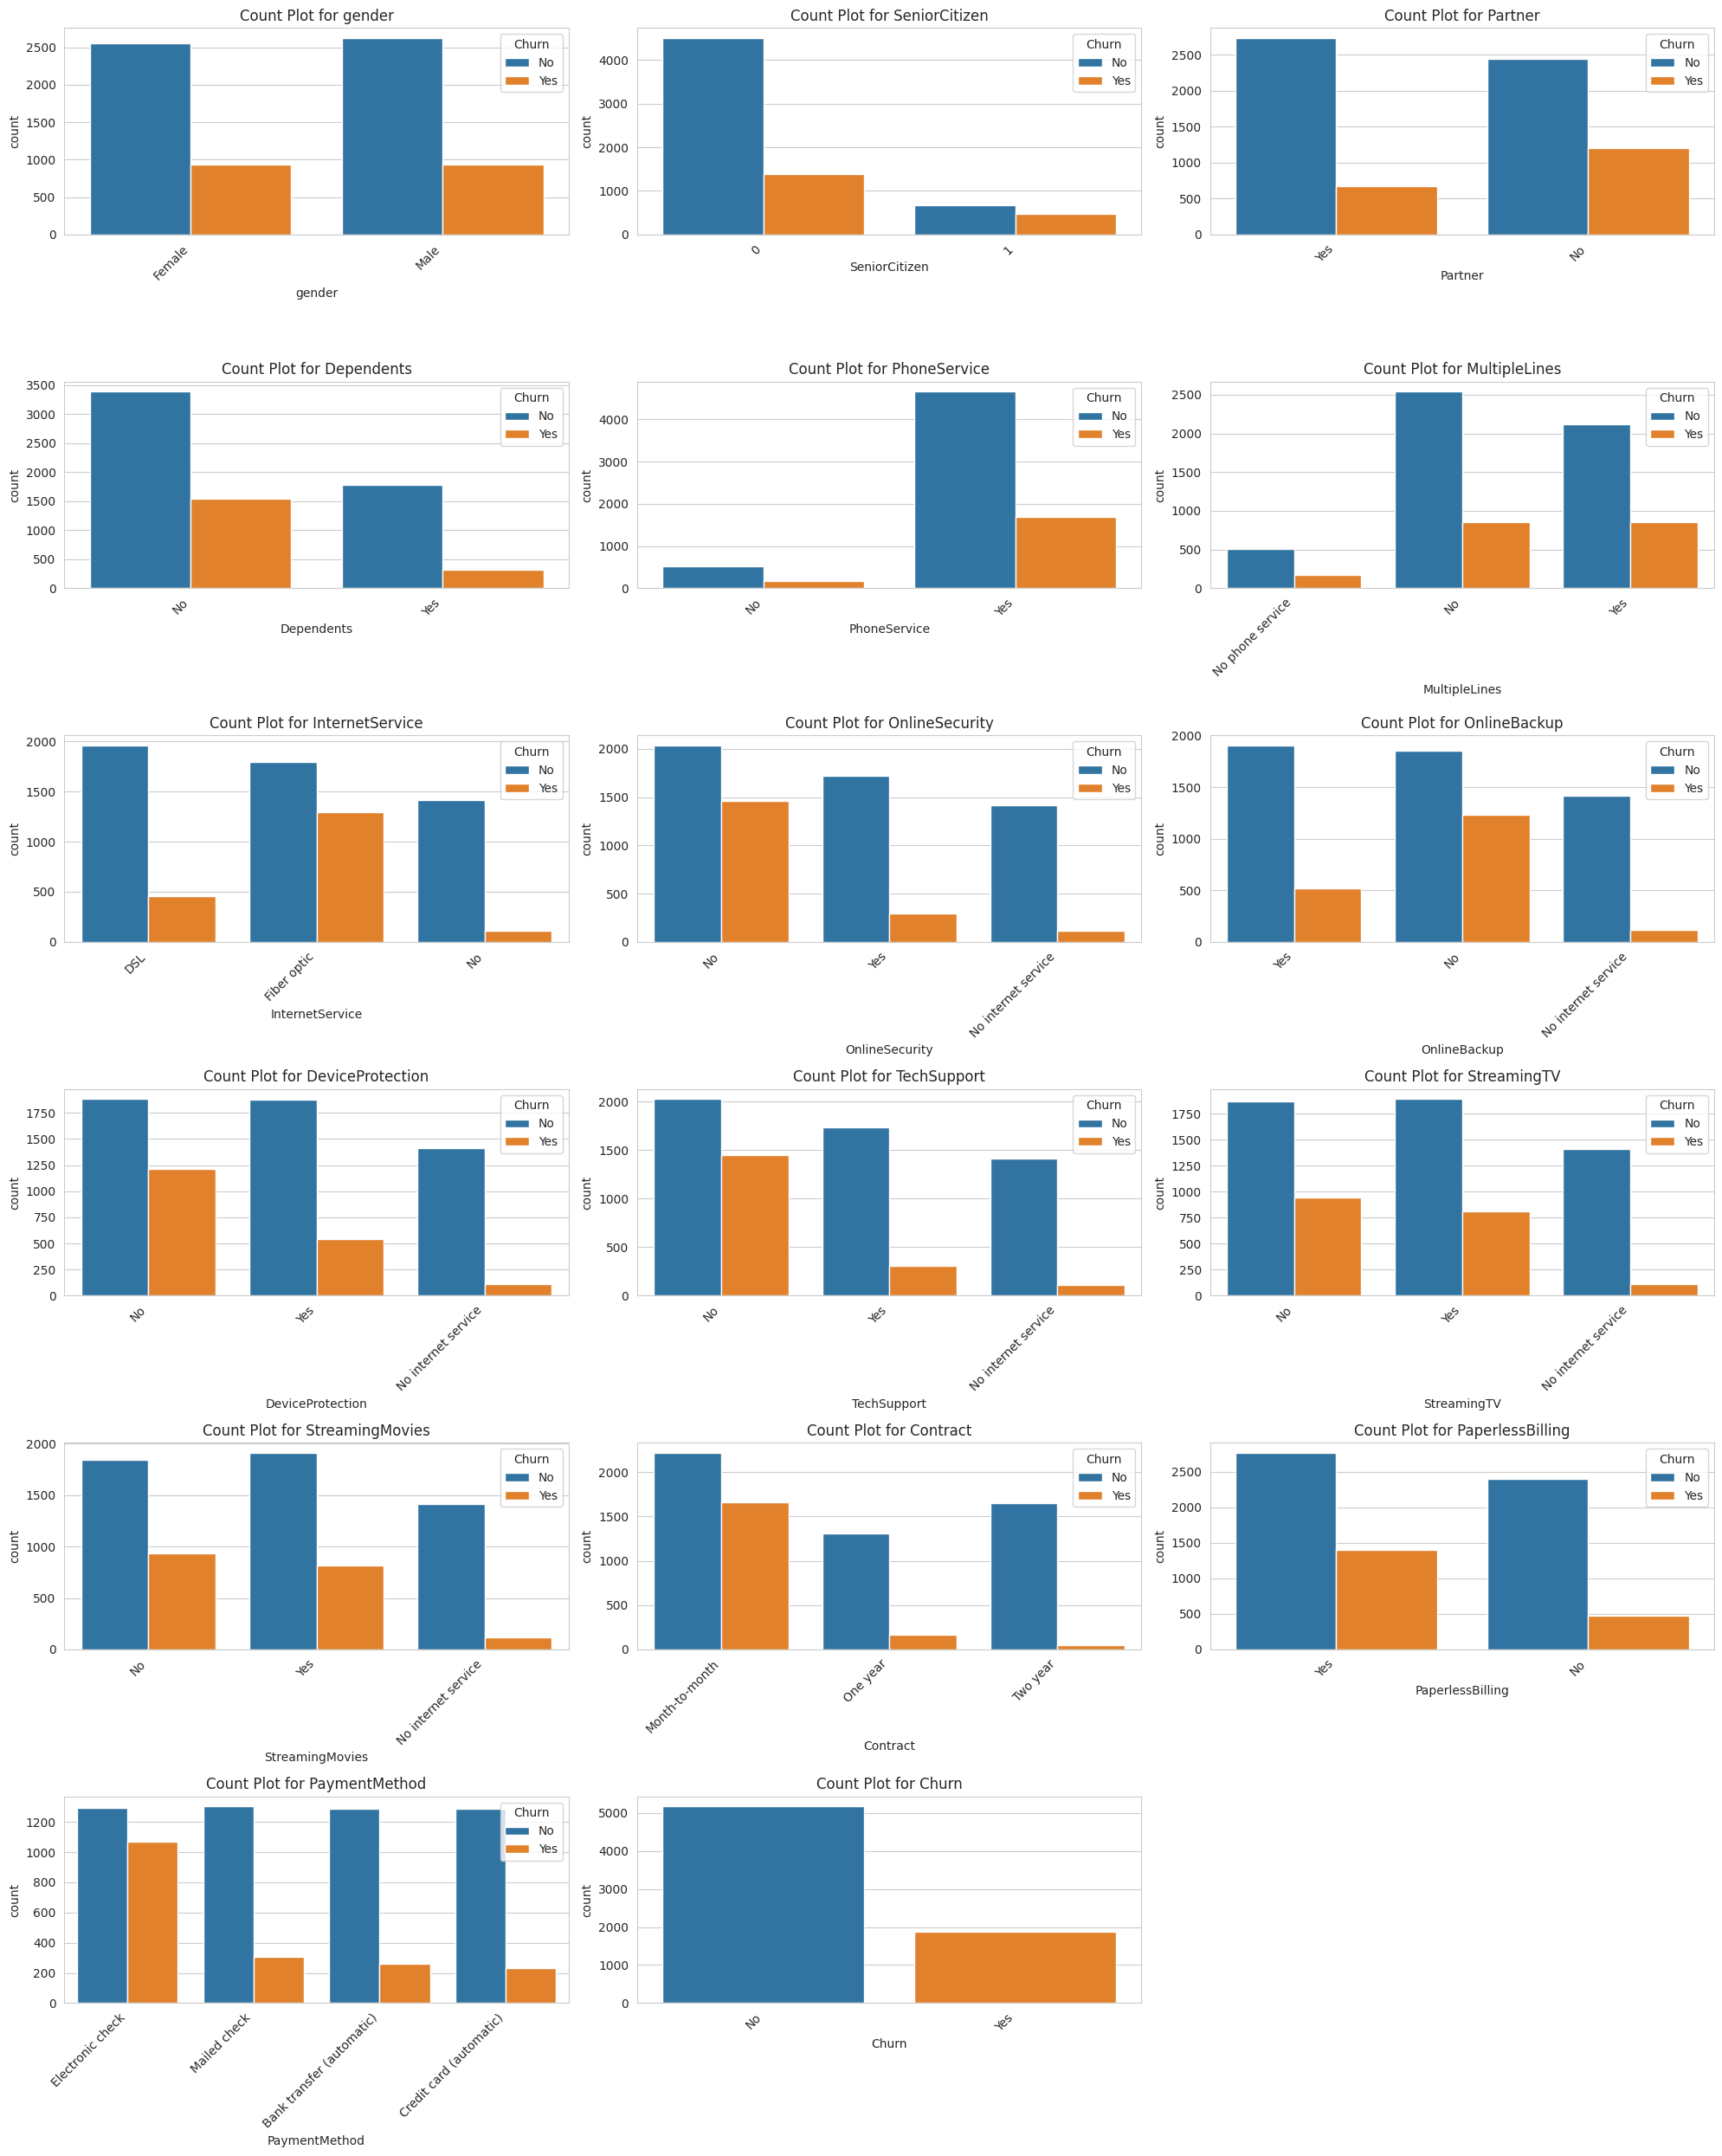

In [199]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Numerical Variables Distribution

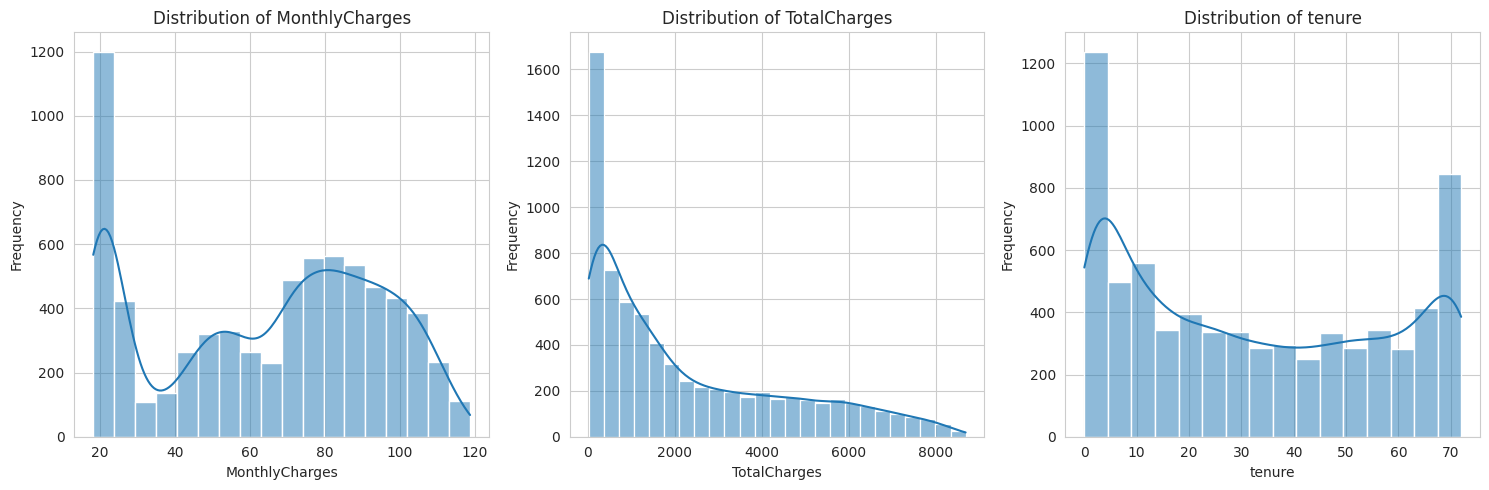

In [200]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

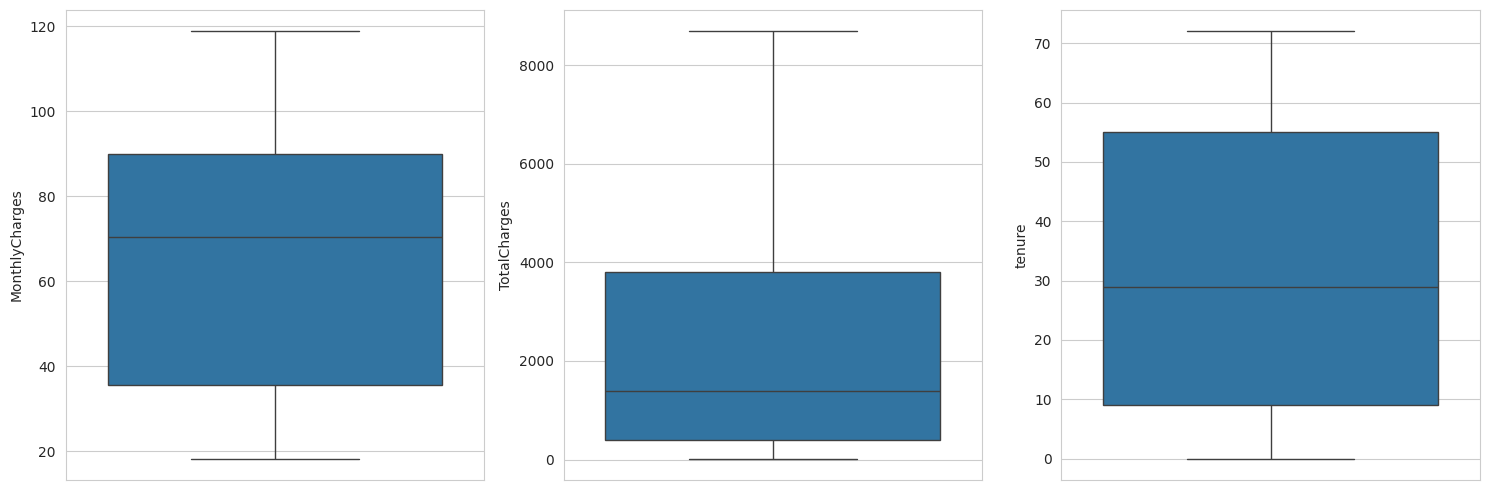

In [201]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df[col])
    # plt.title(f'{col} by Churn')
    # plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [202]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [203]:
numerical_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [204]:
df_cp=df.copy()

In [205]:
df_cp = df_cp.drop(columns=['customerID'])
df_cp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [206]:
len(df_cp.columns)

20

In [207]:
df_cp.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [208]:
df_cp.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [209]:
df_cp['TotalCharges']=df_cp['TotalCharges'].fillna(df_cp['TotalCharges'].median())

In [210]:
df_cp.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [211]:
for col in df_cp.columns:
  # print(col)
  value=df_cp[col].value_counts()
  print(value)
  print('*'*50)
  print("\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
**************************************************


Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
**************************************************


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************


InternetService
Fiber optic    3096
DSL            242

In [212]:
for col in df_cp.columns:
  print("\n")
  print(col)
  print(df_cp[col].unique())

  print("\n")
  print('*'*50)




gender
['Female' 'Male']


**************************************************


SeniorCitizen
[0 1]


**************************************************


Partner
['Yes' 'No']


**************************************************


Dependents
['No' 'Yes']


**************************************************


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


**************************************************


PhoneService
['No' 'Yes']


**************************************************


MultipleLines
['No phone service' 'No' 'Yes']


**************************************************


InternetService
['DSL' 'Fiber optic' 'No']


**************************************************


OnlineSecurity
['No' 'Yes' 'No internet service']


**************************************************


OnlineBackup
['Ye

In [ ]:
# In this dataset there are some features both represent same meaning.Here i convert those to one
df_cp['MultipleLines'] = df_cp['MultipleLines'].replace('No phone service', 'No')
df_cp[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = df_cp[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cp.corr(), cmap = 'YlGnBu', annot = True)

In [213]:
# SeniorCitizen is binary categorical feature
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']
len(categorical_cols)

17

In [214]:
label_encoding_columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
one_hot_encoding_columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

len(label_encoding_columns)+len(one_hot_encoding_columns)

16

#### Label Encoding

In [215]:
#Label encoding method use for binary categories
l_encoder=LabelEncoder()

for col in label_encoding_columns:
  df_cp[col]=l_encoder.fit_transform(df_cp[col])

In [216]:
df_cp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### One-Hot Encoding

In [217]:
#One-Hot encoder use for multi class categories
oneHot_encoder=OneHotEncoder(sparse_output=False,drop=None)
encoded_data=oneHot_encoder.fit_transform(df_cp[one_hot_encoding_columns])
oneHot_encoded_df=pd.DataFrame(encoded_data,columns=oneHot_encoder.get_feature_names_out(one_hot_encoding_columns))

In [218]:
df_cp_final=df_cp.drop(columns=one_hot_encoding_columns)
df_cp_final=pd.concat([df_cp_final,oneHot_encoded_df],axis=1)
df_cp_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Scale Numerical Features

In [219]:
std_sclr=StandardScaler()

for col in numerical_cols:
  df_cp_final[col]=std_sclr.fit_transform(df_cp_final[[col]])

df_cp_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Handle class imbalance

In [220]:
df_cp_final['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [221]:
# Need to handle this,because of this class imbalance ML model can become biased toward the majority class

In [222]:
df_cp_final.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [223]:
X=df_cp_final.drop(columns=['Churn'],axis=1)
y=df_cp_final['Churn']


In [224]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.128655,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,1.613701,1,1,1.277533,2.243151,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.854469,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.872062,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [225]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [226]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [227]:
y_resampled.value_counts()

,count
Churn,
0,5174
1,5174


Text(0.5, 1.0, 'Count Plot for Churn')

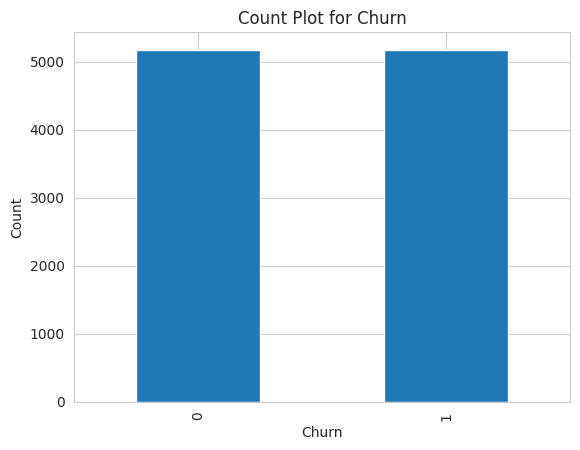

In [228]:
count=y_resampled.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

### Split Data into Training, Validation, and Test Sets

In [229]:

X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of X_val: {X_val.shape}")
# print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (7243, 40)
Shape of y_train: (7243,)
Shape of X_test: (3105, 40)
Shape of y_test: (3105,)


## Train Neural Network

In [230]:
input_dim=X_train.shape[1]
input_dim

40

#### Test 01

In [231]:
# 7. Baseline Keras model
def make_baseline_model(input_dim):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_dim,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

baseline = make_baseline_model(input_dim)
baseline.summary()

# Train baseline
history = baseline.fit(X_train, y_train, validation_split=0.15,
                       epochs=37, batch_size=64,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)],
                       verbose=2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/37


KeyboardInterrupt: 

In [ ]:
# 8. Evaluate baseline
y_pred_proba = baseline.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))


#### Test 02

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

In [ ]:
def make_baseline_model(input_dim):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(input_dim,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

baseline = make_baseline_model(input_dim)
baseline.summary()

# Train baseline
baseline_model_history = baseline.fit(X_train, y_train, validation_split=0.15,
                       epochs=40, batch_size=64,
                       class_weight=class_weights,
                      callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                       verbose=2)


In [ ]:
y_pred_proba_test_02= baseline.predict(X_test).ravel()
y_pred_test_02 = (y_pred_proba >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_test_02))
print("AUC:", roc_auc_score(y_test, y_pred_proba_test_02))
print(classification_report(y_test, y_pred_test_02))

In [ ]:
cm=confusion_matrix(y_test,y_pred_test_02)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
baseline.save("telco_ann_baseline_model.h5")

In [ ]:
baseline_model = keras.models.load_model("telco_ann_baseline_model.h5")

def plot_history(history,title_prefix=""):
    # Loss
    plt.figure(figsize=(18, 6)) # Increase figure size for better readability

# Plot Loss
    plt.subplot(1, 3, 1)
    # plt.figure(figsize=(7,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title_prefix} Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()
    # plt.show()

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title_prefix} Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    # plt.show()

    # AUC
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title(f"{title_prefix} AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.tight_layout()

    plt.show()

plot_history(baseline_model_history,title_prefix="Before Tune model")


#### Hyperparameter Tunning

#### Test 01

In [239]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.000138083402375), 1: np.float64(0.9998619547211486)}


In [ ]:
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
#     # tune number of layers 1-3
#     for i in range(hp.Int('num_layers', 1, 3)):
#         units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=16)
#         model.add(keras.layers.Dense(units, activation='relu'))
#         # optional dropout
#         if hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1) > 0:
#             model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
#     model.add(keras.layers.Dense(1, activation='sigmoid'))

#     # optimizer + learning rate
#     opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
#     if opt_choice == 'adam':
#         lr = hp.Float('adam_lr', 1e-4, 1e-2, sampling='log')
#         optimizer = keras.optimizers.Adam(learning_rate=lr)
#     elif opt_choice == 'rmsprop':
#         lr = hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log')
#         optimizer = keras.optimizers.RMSprop(learning_rate=lr)
#     else:
#         lr = hp.Float('sgd_lr', 1e-4, 1e-2, sampling='log')
#         optimizer = keras.optimizers.SGD(learning_rate=lr)

#     model.compile(optimizer=optimizer,
#                   loss='binary_crossentropy',
#                   metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
#     return model

# # Choose a tuner: RandomSearch or Hyperband
# tuner = kt.RandomSearch(
#     build_model,
#     objective=kt.Objective("val_auc", direction="max"),
#     max_trials=25,
#     executions_per_trial=1,
#     directory='model_his',
#     project_name='telco_churn_ann_Test_1'
# )

# # Run the tuner
# tuner.search(X_train, y_train,
#              epochs=30,
#              validation_split=0.15,
#              class_weight=class_weights,
#              callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
#              batch_size=64)


In [240]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    # tune number of layers 1-3
    for i in range(hp.Int('num_layers', 2, 4)):
        units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=16)
        model.add(keras.layers.Dense(units, activation='relu'))
        # optional dropout
        if hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1) > 0:
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # optimizer + learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if opt_choice == 'adam':
        lr = hp.Float('adam_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'rmsprop':
        lr = hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        lr = hp.Float('sgd_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model

# Choose a tuner: RandomSearch or Hyperband
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=50,
    executions_per_trial=1,
    directory='model_his',
    project_name='telco_churn_ann_Test_1'
)

# Run the tuner
tuner.search(X_train, y_train,
             epochs=100,
             validation_split=0.15,
             class_weight=class_weights,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             batch_size=64)


Trial 50 Complete [00h 00m 46s]
val_auc: 0.863629937171936

Best val_auc So Far: 0.8804140686988831
Total elapsed time: 00h 39m 13s


In [241]:
# 10. Get best model and evaluate on test
best_hps_test_01 = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps_test_01.values)

# best_tuned_model = tuner.get_best_models(num_models=1)[0]

{'num_layers': 4, 'units_0': 160, 'dropout_0': 0.1, 'units_1': 192, 'dropout_1': 0.0, 'optimizer': 'adam', 'adam_lr': 0.00034597172419108214, 'units_2': 80, 'dropout_2': 0.1, 'rmsprop_lr': 0.0021233198096917887, 'units_3': 224, 'dropout_3': 0.2}


In [242]:
# 1. Get the best hyperparameters
best_hps_test_01 = tuner.get_best_hyperparameters(1)[0]

# 2. Build the model using these hyperparameters
best_tuned_model_test_01 = build_model(best_hps_test_01)

# 3. Retrain the model so we get history (needed for visualization)
history_tuned_test_01 = best_tuned_model_test_01.fit(
    X_train, y_train,
    epochs=40,
    validation_split=0.15,
    class_weight=class_weights,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=4, restore_best_weights=True
    )],
    verbose=2
)


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


97/97 - 4s - 38ms/step - accuracy: 0.7451 - auc: 0.8152 - loss: 0.5280 - val_accuracy: 0.7608 - val_auc: 0.8467 - val_loss: 0.4856
Epoch 2/40
97/97 - 1s - 6ms/step - accuracy: 0.7705 - auc: 0.8521 - loss: 0.4753 - val_accuracy: 0.7682 - val_auc: 0.8517 - val_loss: 0.4733
Epoch 3/40
97/97 - 1s - 7ms/step - accuracy: 0.7766 - auc: 0.8559 - loss: 0.4696 - val_accuracy: 0.7700 - val_auc: 0.8537 - val_loss: 0.4683
Epoch 4/40
97/97 - 1s - 9ms/step - accuracy: 0.7827 - auc: 0.8587 - loss: 0.4648 - val_accuracy: 0.7810 - val_auc: 0.8551 - val_loss: 0.4664
Epoch 5/40
97/97 - 1s - 11ms/step - accuracy: 0.7836 - auc: 0.8653 - loss: 0.4549 - val_accuracy: 0.7645 - val_auc: 0.8581 - val_loss: 0.4637
Epoch 6/40
97/97 - 1s - 10ms/step - accuracy: 0.7914 - auc: 0.8670 - loss: 0.4522 - val_accuracy: 0.7829 - val_auc: 0.8590 - val_loss: 0.4610
Epoch 7/40
97/97 - 1s - 10ms/step - accuracy: 0.7885 - auc: 0.8720 - loss: 0.4437 - val_accuracy: 0.7866 - val_auc: 0.8631 - val_loss: 0.4540
Epoch 8/40
97/97 - 1

In [243]:
# Evaluate
y_pred_tuned_proba = best_tuned_model_test_01.predict(X_test).ravel()
y_pred_tuned = (y_pred_tuned_proba >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_tuned_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Test AUC: 0.8847446080416353
Test Accuracy: 0.8106280193236715
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1553
           1       0.78      0.86      0.82      1552

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [244]:
print("\n=== Final Training vs Validation Performance ===")

# Get the metrics from the last epoch (or best epoch if early stopping restored weights)
train_loss = history_tuned_test_01.history['loss'][-1]
train_accuracy = history_tuned_test_01.history['accuracy'][-1]
train_auc = history_tuned_test_01.history['auc'][-1]

val_loss = history_tuned_test_01.history['val_loss'][-1]
val_accuracy = history_tuned_test_01.history['val_accuracy'][-1]
val_auc = history_tuned_test_01.history['val_auc'][-1]

print(f"Training   - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, AUC: {train_auc:.4f}")
print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, AUC: {val_auc:.4f}")
print(f"Test       -        Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}, AUC: {roc_auc_score(y_test, y_pred_tuned_proba):.4f}")


=== Final Training vs Validation Performance ===
Training   - Loss: 0.3372, Accuracy: 0.8577, AUC: 0.9254
Validation - Loss: 0.4272, Accuracy: 0.8105, AUC: 0.8834
Test       -        Accuracy: 0.8106, AUC: 0.8847


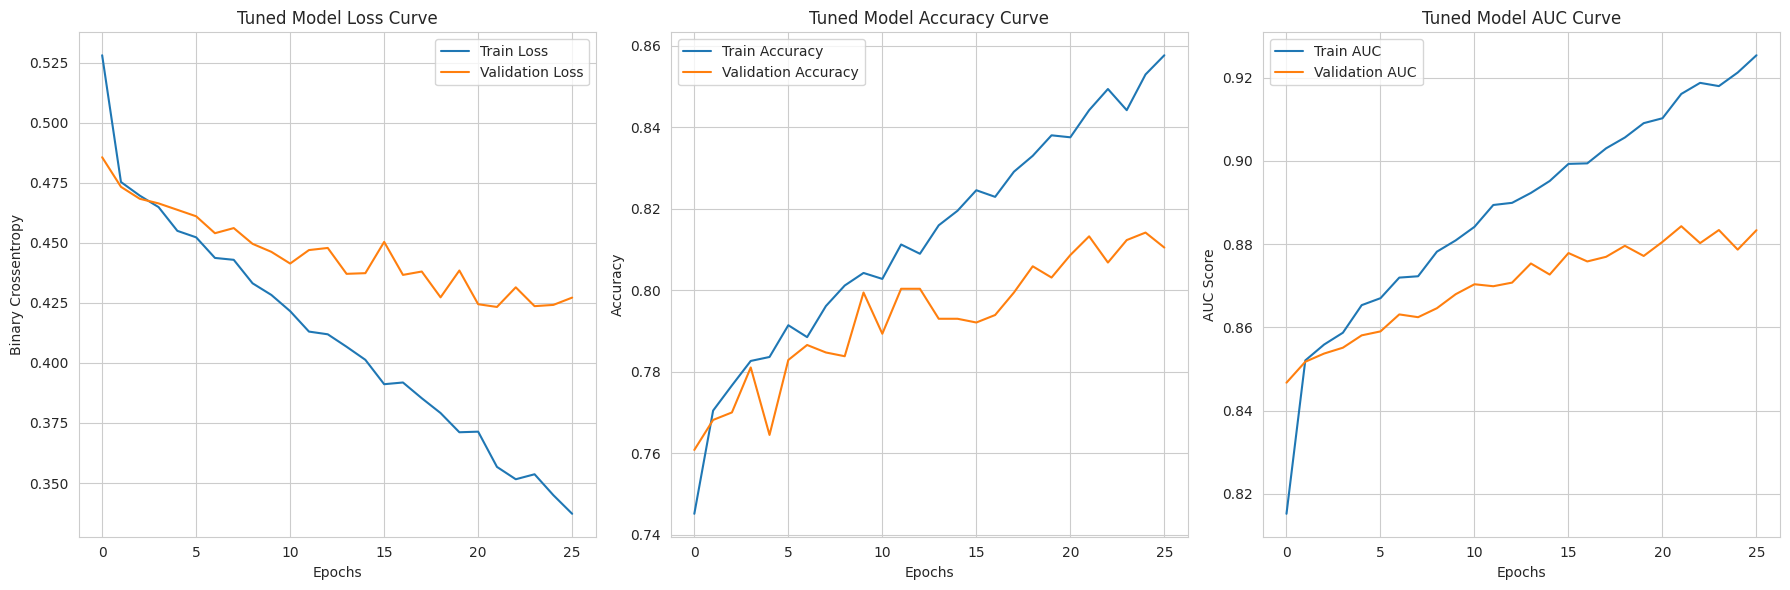

In [246]:
plot_history(history_tuned_test_01, title_prefix="Tuned Model")


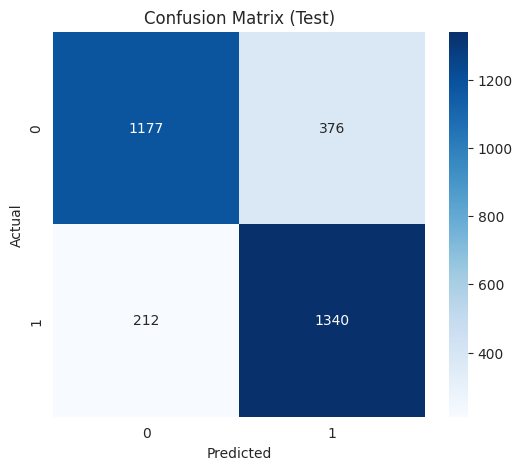

In [245]:
# best_model.save("telco_ann_best_model.h5")
cm=confusion_matrix(y_test,y_pred_tuned)
cm
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [247]:
cm


array([[1177,  376],
       [ 212, 1340]])

#### Before hyperparameter tuning and after tuning result comparision

In [ ]:
baseline_auc = roc_auc_score(y_test, y_pred_proba_test_02)
baseline_accuracy = accuracy_score(y_test, y_pred_test_02)

tuned_auc = roc_auc_score(y_test, y_pred_tuned_proba)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

metrics = {
    'Model': ['Baseline', 'Tuned'],
    'AUC': [baseline_auc, tuned_auc],
    'Accuracy': [baseline_accuracy, tuned_accuracy]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)



In [ ]:
plot_history(history_tuned, title_prefix="Tuned Model")


In [ ]:
plot_history(baseline_model_history,title_prefix="Before Tune model")


In [ ]:
# import shutil

# # Zip the kt_tuner_dir folder
# shutil.make_archive("kt_tuner_dir", 'zip', "kt_tuner_dir")

# # Download the zipped folder
# from google.colab import files
# files.download("kt_tuner_dir.zip")
